# Support Vector Machine
## HiggsML Challenge

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [20]:
dirName = '../../data/'
fileName = dirName + 'training.csv'
data = pd.read_csv(fileName)

## Add Physical Features
by Tim Salimans

In [21]:
def addFeatures(df):
    df['TIM_abs_eta_tau'] = np.abs(df.PRI_tau_eta)
    df['TIM_abs_eta_lep'] = np.abs(df.PRI_lep_eta)   
    df['TIM_abs_eta_jet1'] = np.abs(df.PRI_jet_leading_eta)   
    df['TIM_abs_eta_jet2'] = np.abs(df.PRI_jet_subleading_eta)       
    df['TIM_deltaeta_tau_lep'] = np.abs(df.PRI_tau_eta-df.PRI_lep_eta)
    df['TIM_deltaeta_tau_jet1'] = np.abs(df.PRI_tau_eta-df.PRI_jet_leading_eta)
    df['TIM_deltaeta_tau_jet2'] = np.abs(df.PRI_tau_eta-df.PRI_jet_subleading_eta)
    df['TIM_deltaeta_lep_jet1'] = np.abs(df.PRI_lep_eta-df.PRI_jet_leading_eta)
    df['TIM_deltaeta_lep_jet2'] = np.abs(df.PRI_lep_eta-df.PRI_jet_subleading_eta)
    df['TIM_deltaeta_jet_jet'] = np.abs(df.PRI_jet_leading_eta-df.PRI_jet_subleading_eta)

    df['TIM_prodeta_tau_lep'] = df.PRI_tau_eta*df.PRI_lep_eta
    df['TIM_prodeta_tau_jet1'] = df.PRI_tau_eta*df.PRI_jet_leading_eta
    df['TIM_prodeta_tau_jet2'] = df.PRI_tau_eta*df.PRI_jet_subleading_eta
    df['TIM_prodeta_lep_jet1'] = df.PRI_lep_eta*df.PRI_jet_leading_eta
    df['TIM_prodeta_lep_jet2'] = df.PRI_lep_eta*df.PRI_jet_subleading_eta
    df['TIM_prodeta_jet_jet'] = df.PRI_jet_leading_eta*df.PRI_jet_subleading_eta
    
    TIM_deltaphi_tau_lep = np.abs(df.PRI_tau_phi-df.PRI_lep_phi)
    TIM_deltaphi_tau_lep[TIM_deltaphi_tau_lep>np.pi] = 2*np.pi-TIM_deltaphi_tau_lep
    TIM_deltaphi_tau_jet1 = np.abs(df.PRI_tau_phi-df.PRI_jet_leading_phi)
    TIM_deltaphi_tau_jet1[TIM_deltaphi_tau_jet1>np.pi] = 2*np.pi-TIM_deltaphi_tau_jet1
    TIM_deltaphi_tau_jet2 = np.abs(df.PRI_tau_phi-df.PRI_jet_subleading_phi)
    TIM_deltaphi_tau_jet2[TIM_deltaphi_tau_jet2>np.pi] = 2*np.pi-TIM_deltaphi_tau_jet2
    TIM_deltaphi_lep_jet1 = np.abs(df.PRI_lep_phi-df.PRI_jet_leading_phi)
    TIM_deltaphi_lep_jet1[TIM_deltaphi_lep_jet1>np.pi] = 2*np.pi-TIM_deltaphi_lep_jet1
    TIM_deltaphi_lep_jet2 = np.abs(df.PRI_lep_phi-df.PRI_jet_subleading_phi)
    TIM_deltaphi_lep_jet2[TIM_deltaphi_lep_jet2>np.pi] = 2*np.pi-TIM_deltaphi_lep_jet2
    TIM_deltaphi_jet_jet = np.abs(df.PRI_jet_leading_phi-df.PRI_jet_subleading_phi)
    TIM_deltaphi_jet_jet[TIM_deltaphi_jet_jet>np.pi] = 2*np.pi-TIM_deltaphi_jet_jet
    
    df['TIM_deltar_tau_lep'] = np.sqrt(np.square(df.TIM_deltaeta_tau_lep)+np.square(TIM_deltaphi_tau_lep))
    df['TIM_deltar_tau_jet1'] = np.sqrt(np.square(df.TIM_deltaeta_tau_jet1)+np.square(TIM_deltaphi_tau_jet1))
    df['TIM_deltar_tau_jet2'] = np.sqrt(np.square(df.TIM_deltaeta_tau_jet2)+np.square(TIM_deltaphi_tau_jet2))
    df['TIM_deltar_lep_jet1'] = np.sqrt(np.square(df.TIM_deltaeta_lep_jet1)+np.square(TIM_deltaphi_lep_jet1))
    df['TIM_deltar_lep_jet2'] = np.sqrt(np.square(df.TIM_deltaeta_lep_jet2)+np.square(TIM_deltaphi_lep_jet2))
    df['TIM_deltar_jet_jet'] = np.sqrt(np.square(df.TIM_deltaeta_jet_jet)+np.square(TIM_deltaphi_jet_jet))
    
    #d = np.sign(np.pi - np.abs(df.PRI_tau_phi - df.PRI_lep_phi))
    d = df.PRI_tau_phi - df.PRI_lep_phi
    d = 1.0 - 2.0*((d>np.pi)|((d<0) & (d>-np.pi)))
    a = np.sin(df.PRI_met_phi-df.PRI_lep_phi)
    b = np.sin(df.PRI_tau_phi-df.PRI_met_phi)
    df['TIM_met_phi_centrality'] = d*(a+b)/np.sqrt(np.square(a)+np.square(b))
    
    df['TIM_lep_eta_centrality'] = np.exp(-4.0*np.square(df.PRI_lep_eta-(df.PRI_jet_leading_eta+df.PRI_jet_subleading_eta)/2)/np.square(df.PRI_jet_leading_eta-df.PRI_jet_subleading_eta))
    df['TIM_tau_eta_centrality'] = np.exp(-4.0*np.square(df.PRI_tau_eta-(df.PRI_jet_leading_eta+df.PRI_jet_subleading_eta)/2)/np.square(df.PRI_jet_leading_eta-df.PRI_jet_subleading_eta))   
    
    df['TIM_pt2_met_tau'] = (np.square(df.PRI_met*np.cos(df.PRI_met_phi) + df.PRI_tau_pt*np.cos(df.PRI_tau_phi))
        + np.square(df.PRI_met*np.sin(df.PRI_met_phi) + df.PRI_tau_pt*np.sin(df.PRI_tau_phi)))
    df['TIM_pt2_met_lep'] = (np.square(df.PRI_met*np.cos(df.PRI_met_phi) + df.PRI_lep_pt*np.cos(df.PRI_lep_phi))
        + np.square(df.PRI_met*np.sin(df.PRI_met_phi) + df.PRI_lep_pt*np.sin(df.PRI_lep_phi)))
    df['TIM_pt2_met_jet1'] = (np.square(df.PRI_met*np.cos(df.PRI_met_phi) + df.PRI_jet_leading_pt*np.cos(df.PRI_jet_leading_phi))
        + np.square(df.PRI_met*np.sin(df.PRI_met_phi) + df.PRI_jet_leading_pt*np.sin(df.PRI_jet_leading_phi)))
    df['TIM_pt2_met_jet2'] = (np.square(df.PRI_met*np.cos(df.PRI_met_phi) + df.PRI_jet_subleading_pt*np.cos(df.PRI_jet_subleading_phi))
        + np.square(df.PRI_met*np.sin(df.PRI_met_phi) + df.PRI_jet_subleading_pt*np.sin(df.PRI_jet_subleading_phi)))
    df['TIM_pt2_tau_lep'] = (np.square(df.PRI_tau_pt*np.cos(df.PRI_tau_phi) + df.PRI_lep_pt*np.cos(df.PRI_lep_phi))
        + np.square(df.PRI_tau_pt*np.sin(df.PRI_tau_phi) + df.PRI_lep_pt*np.sin(df.PRI_lep_phi)))
    df['TIM_pt2_tau_jet1'] = (np.square(df.PRI_tau_pt*np.cos(df.PRI_tau_phi) + df.PRI_jet_leading_pt*np.cos(df.PRI_jet_leading_phi))
        + np.square(df.PRI_tau_pt*np.sin(df.PRI_tau_phi) + df.PRI_jet_leading_pt*np.sin(df.PRI_jet_leading_phi)))
    df['TIM_pt2_tau_jet2'] = (np.square(df.PRI_tau_pt*np.cos(df.PRI_tau_phi) + df.PRI_jet_subleading_pt*np.cos(df.PRI_jet_subleading_phi))
        + np.square(df.PRI_tau_pt*np.sin(df.PRI_tau_phi) + df.PRI_jet_subleading_pt*np.sin(df.PRI_jet_subleading_phi)))    
    df['TIM_pt2_lep_jet1'] = (np.square(df.PRI_lep_pt*np.cos(df.PRI_lep_phi) + df.PRI_jet_leading_pt*np.cos(df.PRI_jet_leading_phi))
        + np.square(df.PRI_lep_pt*np.sin(df.PRI_lep_phi) + df.PRI_jet_leading_pt*np.sin(df.PRI_jet_leading_phi)))
    df['TIM_pt2_lep_jet2'] = (np.square(df.PRI_lep_pt*np.cos(df.PRI_lep_phi) + df.PRI_jet_subleading_pt*np.cos(df.PRI_jet_subleading_phi))
        + np.square(df.PRI_lep_pt*np.sin(df.PRI_lep_phi) + df.PRI_jet_subleading_pt*np.sin(df.PRI_jet_subleading_phi)))
    df['TIM_pt2_jet_jet'] = (np.square(df.PRI_jet_leading_pt*np.cos(df.PRI_jet_leading_phi) + df.PRI_jet_subleading_pt*np.cos(df.PRI_jet_subleading_phi))
        + np.square(df.PRI_jet_leading_pt*np.sin(df.PRI_jet_leading_phi) + df.PRI_jet_subleading_pt*np.sin(df.PRI_jet_subleading_phi)))    
    
    df['TIM_trans_mass_met_tau'] = np.sqrt(np.square(df.PRI_met+df.PRI_tau_pt)-df.TIM_pt2_met_tau)
    df['TIM_trans_mass_met_lep'] = np.sqrt(np.square(df.PRI_met+df.PRI_lep_pt)-df.TIM_pt2_met_lep)
    df['TIM_trans_mass_met_jet1'] = np.sqrt(np.square(df.PRI_met+df.PRI_jet_leading_pt)-df.TIM_pt2_met_jet1)
    df['TIM_trans_mass_met_jet2'] = np.sqrt(np.square(df.PRI_met+df.PRI_jet_subleading_pt)-df.TIM_pt2_met_jet2)
    df['TIM_trans_mass_tau_lep'] = np.sqrt(np.square(df.PRI_tau_pt+df.PRI_lep_pt)-df.TIM_pt2_tau_lep)
    df['TIM_trans_mass_tau_jet1'] = np.sqrt(np.square(df.PRI_tau_pt+df.PRI_jet_leading_pt)-df.TIM_pt2_tau_jet1)
    df['TIM_trans_mass_tau_jet2'] = np.sqrt(np.square(df.PRI_tau_pt+df.PRI_jet_subleading_pt)-df.TIM_pt2_tau_jet2)
    df['TIM_trans_mass_lep_jet1'] = np.sqrt(np.square(df.PRI_lep_pt+df.PRI_jet_leading_pt)-df.TIM_pt2_lep_jet1)
    df['TIM_trans_mass_lep_jet2'] = np.sqrt(np.square(df.PRI_lep_pt+df.PRI_jet_subleading_pt)-df.TIM_pt2_lep_jet2)
    df['TIM_trans_mass_jet_jet'] = np.sqrt(np.square(df.PRI_jet_leading_pt+df.PRI_jet_subleading_pt)-df.TIM_pt2_jet_jet)

    df['TIM_p2_tau_lep'] = df.TIM_pt2_tau_lep + np.square(df.PRI_tau_pt*np.sinh(df.PRI_tau_eta) + df.PRI_lep_pt*np.sinh(df.PRI_lep_eta))
    df['TIM_p2_tau_jet1'] = df.TIM_pt2_tau_jet1 + np.square(df.PRI_tau_pt*np.sinh(df.PRI_tau_eta) + df.PRI_jet_leading_pt*np.sinh(df.PRI_jet_leading_eta))
    df['TIM_p2_tau_jet2'] = df.TIM_pt2_tau_jet2 + np.square(df.PRI_tau_pt*np.sinh(df.PRI_tau_eta) + df.PRI_jet_subleading_pt*np.sinh(df.PRI_jet_subleading_eta))   
    df['TIM_p2_lep_jet1'] = df.TIM_pt2_lep_jet1 + np.square(df.PRI_lep_pt*np.sinh(df.PRI_lep_eta) + df.PRI_jet_leading_pt*np.sinh(df.PRI_jet_leading_eta))
    df['TIM_p2_lep_jet2'] = df.TIM_pt2_lep_jet2 + np.square(df.PRI_lep_pt*np.sinh(df.PRI_lep_eta) + df.PRI_jet_subleading_pt*np.sinh(df.PRI_jet_subleading_eta))
    df['TIM_p2_jet_jet'] = df.TIM_pt2_jet_jet + np.square(df.PRI_jet_leading_pt*np.sinh(df.PRI_jet_leading_eta) + df.PRI_jet_subleading_pt*np.sinh(df.PRI_jet_subleading_eta))

    df['E_tau'] = df.PRI_tau_pt*np.cosh(df.PRI_tau_eta)
    df['E_lep'] = df.PRI_lep_pt*np.cosh(df.PRI_lep_eta)
    df['E_jet1'] = df.PRI_jet_leading_pt*np.cosh(df.PRI_jet_leading_eta)
    df['E_jet2'] = df.PRI_jet_subleading_pt*np.cosh(df.PRI_jet_subleading_eta)

    df['TIM_mass_tau_lep'] = np.sqrt(np.square(df.E_tau+df.E_lep)-df.TIM_p2_tau_lep)
    df['TIM_mass_tau_jet1'] = np.sqrt(np.square(df.E_tau+df.E_jet1)-df.TIM_p2_tau_jet1)
    df['TIM_mass_tau_jet2'] = np.sqrt(np.square(df.E_tau+df.E_jet2)-df.TIM_p2_tau_jet2)
    df['TIM_mass_lep_jet1'] = np.sqrt(np.square(df.E_lep+df.E_jet1)-df.TIM_p2_lep_jet1)
    df['TIM_mass_lep_jet2'] = np.sqrt(np.square(df.E_lep+df.E_jet2)-df.TIM_p2_lep_jet2)
    df['TIM_mass_jet_jet'] = np.sqrt(np.square(df.E_jet1+df.E_jet2)-df.TIM_p2_jet_jet)

    sum_px = df.PRI_met*np.cos(df.PRI_met_phi) + df.PRI_tau_pt*np.cos(df.PRI_tau_phi) + df.PRI_lep_pt*np.cos(df.PRI_lep_phi)
    sum_py = df.PRI_met*np.sin(df.PRI_met_phi) + df.PRI_tau_pt*np.sin(df.PRI_tau_phi) + df.PRI_lep_pt*np.sin(df.PRI_lep_phi)
    df['TIM_pt_met_tau_lep'] = np.sqrt(np.square(sum_px) + np.square(sum_py))

    sum_px_2 = sum_px + (df.PRI_jet_leading_pt*np.cos(df.PRI_jet_leading_phi)).fillna(0.0)
    sum_py_2 = sum_py + (df.PRI_jet_leading_pt*np.sin(df.PRI_jet_leading_phi)).fillna(0.0)
    df['TIM_pt_met_tau_lep_jet1'] = np.sqrt(np.square(sum_px_2) + np.square(sum_py_2))

    sum_px_3 = sum_px_2 + (df.PRI_jet_subleading_pt*np.cos(df.PRI_jet_subleading_phi)).fillna(0.0)
    sum_py_3 = sum_py_2 + (df.PRI_jet_subleading_pt*np.sin(df.PRI_jet_subleading_phi)).fillna(0.0)
    df['TIM_pt_met_tau_lep_jet1_jet2'] = np.sqrt(np.square(sum_px_3) + np.square(sum_py_3))
    
    df['TIM_sum_pt_met_tau_lep'] = df.PRI_met + df.PRI_tau_pt + df.PRI_lep_pt
    df['TIM_sum_pt_met_tau_lep_jet1'] = df.TIM_sum_pt_met_tau_lep + df.PRI_jet_leading_pt.fillna(0.0)
    df['TIM_sum_pt_met_tau_lep_jet1_jet2'] = df.TIM_sum_pt_met_tau_lep_jet1 + df.PRI_jet_subleading_pt.fillna(0.0)
    df['TIM_sum_pt_met_tau_lep_jet_all'] = df.TIM_sum_pt_met_tau_lep_jet1 + df.PRI_jet_all_pt
    
    df['TIM_sum_pt'] = df.PRI_tau_pt + df.PRI_lep_pt + df.PRI_jet_all_pt

    df['TIM_pt_ratio_lep_tau'] = df.PRI_lep_pt/df.PRI_tau_pt

    return df

def delDER(df):
    for col in df.columns.values:
        if col[:3]=="DER" and col!="DER_mass_MMC":
            df = df.drop(col, axis=1)            
    return df

def delRawAngles(df):
    for col in df.columns.values:
        if col[len(col)-3:]=="phi" or col[len(col)-3:]=="eta":
            df = df.drop(col, axis=1)
    return df


In [22]:
data = addFeatures(data)
data = delDER(data)
data = delRawAngles(data)

## Data Preprocessing

In [23]:
# replace missing values with NaN
data = data.replace(-999.0, np.nan)

# learning data
X = data.copy()
del X['EventId']
del X['Weight']
del X['Label']
y = data['Label']
w = data['Weight']

In [24]:
# handle missing values
from sklearn.preprocessing import Imputer

# replace missing values with NaN
X = X.replace(-999.0, np.nan)

# missing_values is the value of your placeholder, strategy is if you'd like mean, median or mode, and axis=0 means it calculates the imputation based on the other feature values for that sample
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)
missingX = imp.transform(X)

In [25]:
# scale the data for SVM
from sklearn import preprocessing

def scale():
    scaler = preprocessing.StandardScaler()
    missingX_scaled = scaler.fit_transform(missingX)
    return missingX_scaled

missingX_scaled = scale()

In [26]:
# testing SVM
missingX_scaled.shape

(250000, 72)

## Splitting Training set to real training set and test set

In [27]:
Xtrain = missingX_scaled[1:225000]
Xtest = missingX_scaled[-25000:]
ytrain = y[1:225000]
ytest = y[-25000:]
wtrain = w[1:225000]
wtest = w[-25000:]

In [28]:
# minimal subset for faster learning of SVM.fit
Xtrain = missingX_scaled[1:25000]
ytrain = y[1:25000]
wtrain = w[1:25000]
ytrainVals = ytrain.replace(to_replace=['s','b'],value=[1,0])

## SVM

In [29]:
# import
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [30]:
C = 1.0 

In [38]:
# SVM linear
clf = svm.SVC(kernel='linear',verbose=1) # probability=True, 
clf.fit(Xtrain, ytrainVals)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1)

In [36]:
# SVM polynomial
clf = svm.SVC(kernel='poly', degree=3, coef0=1.0,verbose=1)
clf.fit(Xtrain, ytrainVals)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1)

In [31]:
# SVM RBF
clf = svm.SVC(verbose=1)
clf.fit(Xtrain, ytrainVals)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1)

In [34]:
# SVM sigmoid
clf = svm.SVC(kernel='sigmoid', probability=True, verbose=1)
clf.fit(Xtrain, ytrainVals)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=1)

In [88]:
# Gradint Boosting to test WTF is wrong
clf = GBC(n_estimators=50, max_depth=5,min_samples_leaf=200,max_features=10,verbose=1)
clf.fit(Xtrain,ytrainVals) 

      Iter       Train Loss   Remaining Time 
         1           1.2128           31.48s
         2           1.1659           30.14s
         3           1.1184           29.40s
         4           1.0764           28.68s
         5           1.0441           28.32s
         6           1.0134           27.54s
         7           0.9870           26.84s
         8           0.9666           26.09s
         9           0.9436           25.47s
        10           0.9248           24.79s
        20           0.8184           18.46s
        30           0.7757           12.11s
        40           0.7536            5.99s
        50           0.7396            0.00s


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=10, max_leaf_nodes=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

## Validation

In [32]:
# compute AMS
def ams(s, b):
    from math import sqrt,log
    if b==0:
        return 0

    return sqrt(2*((s+b+10)*log(1+float(s)/(b+10))-s))

In [33]:
# compute all measures
def validate(predicted, real, weights):
    sumsig = 0.
    sumbkg = 0.
    tp = 0.
    tn = 0.
    fp = 0.
    fn = 0.
    precision = 0.
    recall = 0.
    acc = 0.
    
    if (predicted.shape[0] != real.shape[0]):
        raise Exception
    
    for i in range(predicted.shape[0]):
        if predicted[i] == "s":
            if real[i] == "s":
                sumsig += weights[i]
                tp += 1
            else:
                sumbkg += weights[i]
                fp += 1
        else:
            if real[i] == "s":
                fn += 1
            else:
                tn += 1
    
    print(tp, fp, fn, tn)
    
    # calculate scores
    amsscore = ams(sumsig * 10, sumbkg * 10)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    acc = (tp + tn) / (tp + fp + tn + fn)
    f1score = (2 * precision * recall)/(precision + recall)

    printScores(tp, tn, fp, fn, precision, recall, acc, f1score, amsscore)
    
    return amsscore

In [34]:
def printScores(tp, tn, fp, fn, precision, recall, acc, f1score, amsscore):
    all = tp + tn + fp + fn
    print("TP: ", tp/all)
    print("TN: ", tn/all)
    print("FP: ", fp/all)
    print("FN: ", fn/all)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Acc: ", acc)
    print("F1: ", f1score)
    print("AMS: ", amsscore)

In [39]:
# validation
predicted = clf.predict(Xtest)
predictedV = pd.Series(predicted).map({1: 's', 0: 'b'})
validate(predictedV, np.array(ytest), np.array(wtest))

5029.0 2216.0 3580.0 14175.0
TP:  0.20116
TN:  0.567
FP:  0.08864
FN:  0.1432
Precision:  0.6941338854382333
Recall:  0.5841561156928795
Acc:  0.76816
F1:  0.6344140280055507
AMS:  2.2014912620675777


2.2014912620675777

## Explore features with Linear SVM

In [570]:
def plotWeights():
    barX = list(abs(clf.coef_[0]))[30:]
    barV = additionalNames
    cols = clf.coef_[0].shape[0] - 30
    ind = np.arange(cols)
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, barX, width=0.6, align='center', color='b')
    #plt.yscale('log')
    ax.set_xticklabels(barV)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=9)
    plt.xticks(range(cols))
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on') # labels along the bottom edge are off
    #ax.xaxis.set_major_locator(1)
    plt.xlim([-1,cols])
    plt.ylabel('Utež logistične regresije')
    plt.tight_layout()
    plt.savefig('svm_weights_miss-sqrt.pdf')

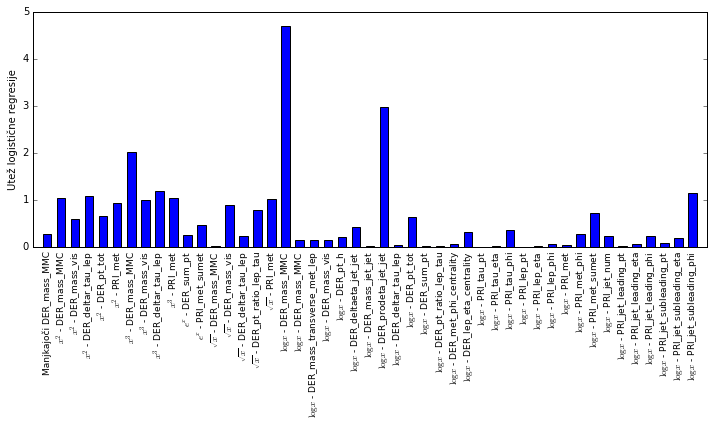

In [698]:
plotWeights()

In [526]:
def selectFeatures(n, threshold):
    barX = list(abs(clf.coef_[0]))[n:]
    cols = clf.coef_[0].shape[0] - n
    names = additionalNames[(n - 30):]
    selNames = []
    for i in range(cols):
        if (barX[i] > threshold):
            selNames.append(names[i])
    return(selNames)

In [699]:
selectFeatures(40, 1)

['$\\sqrt{x}$ - PRI_met',
 '$\\log{x}$ - DER_mass_MMC',
 '$\\log{x}$ - DER_prodeta_jet_jet',
 '$\\log{x}$ - PRI_jet_subleading_phi']

## Explore Features with Logistic Regression

In [255]:
# imports
from sklearn import linear_model

In [359]:
# model & fit
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(Xtrain, ytrainVals)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [360]:
# validation
predicted = logistic.predict(Xtest)
predictedV = pd.Series(predicted).map({1: 's', 0: 'b'})
validate(predictedV, np.array(ytest), np.array(wtest))

5583.0 1987.0 3026.0 14404.0
TP:  0.22332
TN:  0.57616
FP:  0.07948
FN:  0.12104
Precision:  0.7375165125495377
Recall:  0.6485073760018585
Acc:  0.79948
F1:  0.690153903207862
AMS:  2.454486555742746


2.454486555742746

In [361]:
def plotWeights():
    barX = list(abs(logistic.coef_[0]))[30:]
    barV = additionalNames
    cols = logistic.coef_[0].shape[0] - 30
    ind = np.arange(cols)
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, barX, width=0.6, align='center', color='b')
    #plt.yscale('log')
    ax.set_xticklabels(barV)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=90, fontsize=9)
    plt.xticks(range(cols))
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on') # labels along the bottom edge are off
    #ax.xaxis.set_major_locator(1)
    plt.xlim([-1,cols])
    plt.ylabel('Utež logistične regresije')
    plt.tight_layout()
    plt.savefig('lr_weights_x3x3.pdf')

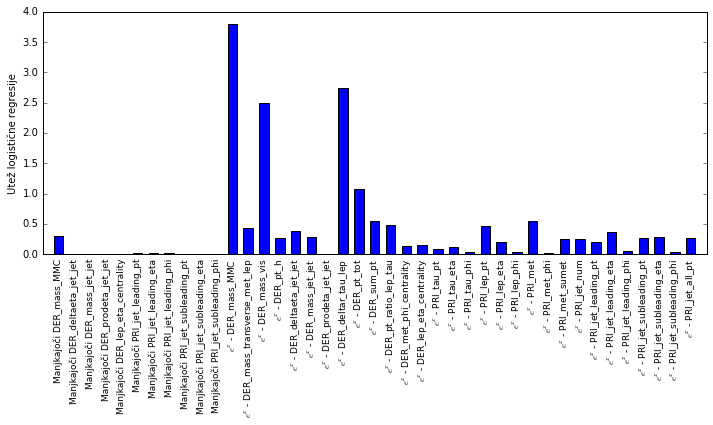

In [362]:
plotWeights()

## Expand Original feature set

In [42]:
# 1 - take original missingX
# 2 - add features based on X and missingX
# 3 - perform scaling
# 4 - use original code above (make sets + SVM)

# remember original missingX
originalMissingX = missingX.copy()

In [43]:
# add missing value information (1 present, 0 missing)
# functions
def hasNaN(name):
    values = list(np.isnan(X[name]).values)
    for i in values:
        if (i == True):
            return True
    return False

def addMissing():
    missX = missingX.copy()
    cols = list(X.columns.values)
    for col in cols:
        if hasNaN(col):
            print('Adding additional feature - missing value:', col)
            myCol = np.isnan(X[col]).map({True: 1, False: 0})
            missX = np.c_[missX, myCol]
            additionalNames.append("Manjkajoči " + col)
    return(missX)

In [47]:
missingX = originalMissingX.copy();
# add columns with missing number
additionalNames = [];
missX = addMissing()

Adding additional feature - missing value: DER_mass_MMC
Adding additional feature - missing value: DER_deltaeta_jet_jet
Adding additional feature - missing value: DER_mass_jet_jet
Adding additional feature - missing value: DER_prodeta_jet_jet
Adding additional feature - missing value: DER_lep_eta_centrality
Adding additional feature - missing value: PRI_jet_leading_pt
Adding additional feature - missing value: PRI_jet_leading_eta
Adding additional feature - missing value: PRI_jet_leading_phi
Adding additional feature - missing value: PRI_jet_subleading_pt
Adding additional feature - missing value: PRI_jet_subleading_eta
Adding additional feature - missing value: PRI_jet_subleading_phi


In [757]:
# write to the table
missingX = missX.copy()

In [719]:
def filterMissing(relevantMissing):
    missX = missingX.copy()
    newAdditionalNames = []
    deletedN = 0
    for x in additionalNames:
        if not (x in relevantMissing):
            nIndex = additionalNames.index(x) - deletedN
            aIndex = nIndex + 30 # we are keeping original features
            print(x)
            
            # remove column
            missX = np.delete(missX, aIndex, 1)
            deletedN = deletedN + 1
        else:
            newAdditionalNames.append(x)
                
    return(missX, newAdditionalNames)

In [720]:
# filter only relevant features
relevantMissing = ['Manjkajoči DER_mass_MMC']
missingX, additionalNames = filterMissing(relevantMissing)

Manjkajoči DER_deltaeta_jet_jet
Manjkajoči DER_mass_jet_jet
Manjkajoči DER_prodeta_jet_jet
Manjkajoči DER_lep_eta_centrality
Manjkajoči PRI_jet_leading_pt
Manjkajoči PRI_jet_leading_eta
Manjkajoči PRI_jet_leading_phi
Manjkajoči PRI_jet_subleading_pt
Manjkajoči PRI_jet_subleading_eta
Manjkajoči PRI_jet_subleading_phi


In [721]:
# add columns with x^2
def x2kernel(x):
    return(x*x)

In [722]:
def addOneX(name, kernel):
    missX = missingX.copy()
    cols = list(X.columns.values)
    i = 0
    for col in cols:
        myCol = kernel(missingX[:,i])
        print(name + ' ' + col)
        missX = np.c_[missX, myCol]
        additionalNames.append(name + " - " + col)
        i = i + 1
    return(missX)

def addOneXNormalized(name, kernel):
    missX = missingX.copy()
    cols = list(X.columns.values)
    i = 0
    for col in cols:
        myCol = kernel(missingX_scaled[:,i])
        print(name + ' ' + col)
        missX = np.c_[missX, myCol]
        additionalNames.append(name + " - " + col)
        i = i + 1
    return(missX)

In [758]:
missX = addOneX('$x^2$', x2kernel)

$x^2$ DER_mass_MMC
$x^2$ DER_mass_transverse_met_lep
$x^2$ DER_mass_vis
$x^2$ DER_pt_h
$x^2$ DER_deltaeta_jet_jet
$x^2$ DER_mass_jet_jet
$x^2$ DER_prodeta_jet_jet
$x^2$ DER_deltar_tau_lep
$x^2$ DER_pt_tot
$x^2$ DER_sum_pt
$x^2$ DER_pt_ratio_lep_tau
$x^2$ DER_met_phi_centrality
$x^2$ DER_lep_eta_centrality
$x^2$ PRI_tau_pt
$x^2$ PRI_tau_eta
$x^2$ PRI_tau_phi
$x^2$ PRI_lep_pt
$x^2$ PRI_lep_eta
$x^2$ PRI_lep_phi
$x^2$ PRI_met
$x^2$ PRI_met_phi
$x^2$ PRI_met_sumet
$x^2$ PRI_jet_num
$x^2$ PRI_jet_leading_pt
$x^2$ PRI_jet_leading_eta
$x^2$ PRI_jet_leading_phi
$x^2$ PRI_jet_subleading_pt
$x^2$ PRI_jet_subleading_eta
$x^2$ PRI_jet_subleading_phi
$x^2$ PRI_jet_all_pt


In [759]:
missingX = missX.copy()

In [725]:
# filter only relevant features
relevantMissing = relevantMissing + ['$x^2$ - DER_mass_MMC',
 '$x^2$ - DER_mass_vis',
 '$x^2$ - DER_deltar_tau_lep',
 '$x^2$ - DER_pt_tot',
 '$x^2$ - PRI_met']
missingX, additionalNames = filterMissing(relevantMissing)

$x^2$ - DER_mass_transverse_met_lep
$x^2$ - DER_pt_h
$x^2$ - DER_deltaeta_jet_jet
$x^2$ - DER_mass_jet_jet
$x^2$ - DER_prodeta_jet_jet
$x^2$ - DER_sum_pt
$x^2$ - DER_pt_ratio_lep_tau
$x^2$ - DER_met_phi_centrality
$x^2$ - DER_lep_eta_centrality
$x^2$ - PRI_tau_pt
$x^2$ - PRI_tau_eta
$x^2$ - PRI_tau_phi
$x^2$ - PRI_lep_pt
$x^2$ - PRI_lep_eta
$x^2$ - PRI_lep_phi
$x^2$ - PRI_met_phi
$x^2$ - PRI_met_sumet
$x^2$ - PRI_jet_num
$x^2$ - PRI_jet_leading_pt
$x^2$ - PRI_jet_leading_eta
$x^2$ - PRI_jet_leading_phi
$x^2$ - PRI_jet_subleading_pt
$x^2$ - PRI_jet_subleading_eta
$x^2$ - PRI_jet_subleading_phi
$x^2$ - PRI_jet_all_pt


In [760]:
# add columns with x^3
def x3kernel(x):
    return(x*x*x)
missX = addOneX('$x^3$', x3kernel)

$x^3$ DER_mass_MMC
$x^3$ DER_mass_transverse_met_lep
$x^3$ DER_mass_vis
$x^3$ DER_pt_h
$x^3$ DER_deltaeta_jet_jet
$x^3$ DER_mass_jet_jet
$x^3$ DER_prodeta_jet_jet
$x^3$ DER_deltar_tau_lep
$x^3$ DER_pt_tot
$x^3$ DER_sum_pt
$x^3$ DER_pt_ratio_lep_tau
$x^3$ DER_met_phi_centrality
$x^3$ DER_lep_eta_centrality
$x^3$ PRI_tau_pt
$x^3$ PRI_tau_eta
$x^3$ PRI_tau_phi
$x^3$ PRI_lep_pt
$x^3$ PRI_lep_eta
$x^3$ PRI_lep_phi
$x^3$ PRI_met
$x^3$ PRI_met_phi
$x^3$ PRI_met_sumet
$x^3$ PRI_jet_num
$x^3$ PRI_jet_leading_pt
$x^3$ PRI_jet_leading_eta
$x^3$ PRI_jet_leading_phi
$x^3$ PRI_jet_subleading_pt
$x^3$ PRI_jet_subleading_eta
$x^3$ PRI_jet_subleading_phi
$x^3$ PRI_jet_all_pt


In [761]:
missingX = missX.copy()

In [674]:
# filter only relevant features
relevantMissing = relevantMissing + ['$x^3$ - DER_mass_MMC',
 '$x^3$ - DER_mass_vis',
 '$x^3$ - DER_deltar_tau_lep',
 '$x^3$ - PRI_met']
missingX, additionalNames = filterMissing(relevantMissing)


$x^3$ - DER_mass_transverse_met_lep
$x^3$ - DER_pt_h
$x^3$ - DER_deltaeta_jet_jet
$x^3$ - DER_mass_jet_jet
$x^3$ - DER_prodeta_jet_jet
$x^3$ - DER_pt_tot
$x^3$ - DER_sum_pt
$x^3$ - DER_pt_ratio_lep_tau
$x^3$ - DER_met_phi_centrality
$x^3$ - DER_lep_eta_centrality
$x^3$ - PRI_tau_pt
$x^3$ - PRI_tau_eta
$x^3$ - PRI_tau_phi
$x^3$ - PRI_lep_pt
$x^3$ - PRI_lep_eta
$x^3$ - PRI_lep_phi
$x^3$ - PRI_met_phi
$x^3$ - PRI_met_sumet
$x^3$ - PRI_jet_num
$x^3$ - PRI_jet_leading_pt
$x^3$ - PRI_jet_leading_eta
$x^3$ - PRI_jet_leading_phi
$x^3$ - PRI_jet_subleading_pt
$x^3$ - PRI_jet_subleading_eta
$x^3$ - PRI_jet_subleading_phi
$x^3$ - PRI_jet_all_pt


In [762]:
# add columns with e^x
def exkernel(x):
    return(np.exp(x))
missX = addOneXNormalized('$e^x$', exkernel)

$e^x$ DER_mass_MMC
$e^x$ DER_mass_transverse_met_lep
$e^x$ DER_mass_vis
$e^x$ DER_pt_h
$e^x$ DER_deltaeta_jet_jet
$e^x$ DER_mass_jet_jet
$e^x$ DER_prodeta_jet_jet
$e^x$ DER_deltar_tau_lep
$e^x$ DER_pt_tot
$e^x$ DER_sum_pt
$e^x$ DER_pt_ratio_lep_tau
$e^x$ DER_met_phi_centrality
$e^x$ DER_lep_eta_centrality
$e^x$ PRI_tau_pt
$e^x$ PRI_tau_eta
$e^x$ PRI_tau_phi
$e^x$ PRI_lep_pt
$e^x$ PRI_lep_eta
$e^x$ PRI_lep_phi
$e^x$ PRI_met
$e^x$ PRI_met_phi
$e^x$ PRI_met_sumet
$e^x$ PRI_jet_num
$e^x$ PRI_jet_leading_pt
$e^x$ PRI_jet_leading_eta
$e^x$ PRI_jet_leading_phi
$e^x$ PRI_jet_subleading_pt
$e^x$ PRI_jet_subleading_eta
$e^x$ PRI_jet_subleading_phi
$e^x$ PRI_jet_all_pt


In [763]:
missingX = missX.copy()

In [728]:
# filter only relevant features
relevantMissing = relevantMissing + ['$e^x$ - DER_sum_pt', '$e^x$ - PRI_met_sumet']
missingX, additionalNames = filterMissing(relevantMissing)

$e^x$ - DER_mass_MMC
$e^x$ - DER_mass_transverse_met_lep
$e^x$ - DER_mass_vis
$e^x$ - DER_pt_h
$e^x$ - DER_deltaeta_jet_jet
$e^x$ - DER_mass_jet_jet
$e^x$ - DER_prodeta_jet_jet
$e^x$ - DER_deltar_tau_lep
$e^x$ - DER_pt_tot
$e^x$ - DER_pt_ratio_lep_tau
$e^x$ - DER_met_phi_centrality
$e^x$ - DER_lep_eta_centrality
$e^x$ - PRI_tau_pt
$e^x$ - PRI_tau_eta
$e^x$ - PRI_tau_phi
$e^x$ - PRI_lep_pt
$e^x$ - PRI_lep_eta
$e^x$ - PRI_lep_phi
$e^x$ - PRI_met
$e^x$ - PRI_met_phi
$e^x$ - PRI_jet_num
$e^x$ - PRI_jet_leading_pt
$e^x$ - PRI_jet_leading_eta
$e^x$ - PRI_jet_leading_phi
$e^x$ - PRI_jet_subleading_pt
$e^x$ - PRI_jet_subleading_eta
$e^x$ - PRI_jet_subleading_phi
$e^x$ - PRI_jet_all_pt


In [764]:
# add columns with sqrt(x)
def sqrtkernel(x):
    xArray = []
    for val in x:
        if (val > 0):
            xArray.append(np.sqrt(val))
        else:
            xArray.append(-np.sqrt(-val))
    return xArray;
missX = addOneX('$\sqrt{x}$', sqrtkernel)

$\sqrt{x}$ DER_mass_MMC
$\sqrt{x}$ DER_mass_transverse_met_lep
$\sqrt{x}$ DER_mass_vis
$\sqrt{x}$ DER_pt_h
$\sqrt{x}$ DER_deltaeta_jet_jet
$\sqrt{x}$ DER_mass_jet_jet
$\sqrt{x}$ DER_prodeta_jet_jet
$\sqrt{x}$ DER_deltar_tau_lep
$\sqrt{x}$ DER_pt_tot
$\sqrt{x}$ DER_sum_pt
$\sqrt{x}$ DER_pt_ratio_lep_tau
$\sqrt{x}$ DER_met_phi_centrality
$\sqrt{x}$ DER_lep_eta_centrality
$\sqrt{x}$ PRI_tau_pt
$\sqrt{x}$ PRI_tau_eta
$\sqrt{x}$ PRI_tau_phi
$\sqrt{x}$ PRI_lep_pt
$\sqrt{x}$ PRI_lep_eta
$\sqrt{x}$ PRI_lep_phi
$\sqrt{x}$ PRI_met
$\sqrt{x}$ PRI_met_phi
$\sqrt{x}$ PRI_met_sumet
$\sqrt{x}$ PRI_jet_num
$\sqrt{x}$ PRI_jet_leading_pt
$\sqrt{x}$ PRI_jet_leading_eta
$\sqrt{x}$ PRI_jet_leading_phi
$\sqrt{x}$ PRI_jet_subleading_pt
$\sqrt{x}$ PRI_jet_subleading_eta
$\sqrt{x}$ PRI_jet_subleading_phi
$\sqrt{x}$ PRI_jet_all_pt


In [765]:
missingX = missX.copy()

In [731]:
# filter only relevant features
relevantMissing = relevantMissing + ['$\\sqrt{x}$ - DER_mass_MMC',
 '$\\sqrt{x}$ - DER_mass_vis',
 '$\\sqrt{x}$ - DER_deltar_tau_lep',
 '$\\sqrt{x}$ - DER_pt_ratio_lep_tau',
 '$\\sqrt{x}$ - PRI_met']
missingX, additionalNames = filterMissing(relevantMissing)

$\sqrt{x}$ - DER_mass_transverse_met_lep
$\sqrt{x}$ - DER_pt_h
$\sqrt{x}$ - DER_deltaeta_jet_jet
$\sqrt{x}$ - DER_mass_jet_jet
$\sqrt{x}$ - DER_prodeta_jet_jet
$\sqrt{x}$ - DER_pt_tot
$\sqrt{x}$ - DER_sum_pt
$\sqrt{x}$ - DER_met_phi_centrality
$\sqrt{x}$ - DER_lep_eta_centrality
$\sqrt{x}$ - PRI_tau_pt
$\sqrt{x}$ - PRI_tau_eta
$\sqrt{x}$ - PRI_tau_phi
$\sqrt{x}$ - PRI_lep_pt
$\sqrt{x}$ - PRI_lep_eta
$\sqrt{x}$ - PRI_lep_phi
$\sqrt{x}$ - PRI_met_phi
$\sqrt{x}$ - PRI_met_sumet
$\sqrt{x}$ - PRI_jet_num
$\sqrt{x}$ - PRI_jet_leading_pt
$\sqrt{x}$ - PRI_jet_leading_eta
$\sqrt{x}$ - PRI_jet_leading_phi
$\sqrt{x}$ - PRI_jet_subleading_pt
$\sqrt{x}$ - PRI_jet_subleading_eta
$\sqrt{x}$ - PRI_jet_subleading_phi
$\sqrt{x}$ - PRI_jet_all_pt


In [766]:
# add columns with log(x)
def logkernel(x):
    xArray = []
    for val in x:
        if (val > 0):
            xArray.append(np.log(val))
        elif (val == 0):
            xArray.append(0.0)
        else:
            xArray.append(-np.log(-val))
    return xArray;
missX = addOneX('$\log{x}$', logkernel)

$\log{x}$ DER_mass_MMC
$\log{x}$ DER_mass_transverse_met_lep
$\log{x}$ DER_mass_vis
$\log{x}$ DER_pt_h
$\log{x}$ DER_deltaeta_jet_jet
$\log{x}$ DER_mass_jet_jet
$\log{x}$ DER_prodeta_jet_jet
$\log{x}$ DER_deltar_tau_lep
$\log{x}$ DER_pt_tot
$\log{x}$ DER_sum_pt
$\log{x}$ DER_pt_ratio_lep_tau
$\log{x}$ DER_met_phi_centrality
$\log{x}$ DER_lep_eta_centrality
$\log{x}$ PRI_tau_pt
$\log{x}$ PRI_tau_eta
$\log{x}$ PRI_tau_phi
$\log{x}$ PRI_lep_pt
$\log{x}$ PRI_lep_eta
$\log{x}$ PRI_lep_phi
$\log{x}$ PRI_met
$\log{x}$ PRI_met_phi
$\log{x}$ PRI_met_sumet
$\log{x}$ PRI_jet_num
$\log{x}$ PRI_jet_leading_pt
$\log{x}$ PRI_jet_leading_eta
$\log{x}$ PRI_jet_leading_phi
$\log{x}$ PRI_jet_subleading_pt
$\log{x}$ PRI_jet_subleading_eta
$\log{x}$ PRI_jet_subleading_phi
$\log{x}$ PRI_jet_all_pt


In [767]:
missingX = missX.copy()

In [700]:
# filter only relevant features
relevantMissing = relevantMissing + ['$\\log{x}$ - DER_mass_MMC',
 '$\\log{x}$ - DER_prodeta_jet_jet',
 '$\\log{x}$ - PRI_jet_subleading_phi']
missingX, additionalNames = filterMissing(relevantMissing)

$\log{x}$ - DER_mass_transverse_met_lep
$\log{x}$ - DER_mass_vis
$\log{x}$ - DER_pt_h
$\log{x}$ - DER_deltaeta_jet_jet
$\log{x}$ - DER_mass_jet_jet
$\log{x}$ - DER_deltar_tau_lep
$\log{x}$ - DER_pt_tot
$\log{x}$ - DER_sum_pt
$\log{x}$ - DER_pt_ratio_lep_tau
$\log{x}$ - DER_met_phi_centrality
$\log{x}$ - DER_lep_eta_centrality
$\log{x}$ - PRI_tau_pt
$\log{x}$ - PRI_tau_eta
$\log{x}$ - PRI_tau_phi
$\log{x}$ - PRI_lep_pt
$\log{x}$ - PRI_lep_eta
$\log{x}$ - PRI_lep_phi
$\log{x}$ - PRI_met
$\log{x}$ - PRI_met_phi
$\log{x}$ - PRI_met_sumet
$\log{x}$ - PRI_jet_num
$\log{x}$ - PRI_jet_leading_pt
$\log{x}$ - PRI_jet_leading_eta
$\log{x}$ - PRI_jet_leading_phi
$\log{x}$ - PRI_jet_subleading_pt
$\log{x}$ - PRI_jet_subleading_eta
$\log{x}$ - PRI_jet_all_pt


IndexError: index 51 is out of bounds for axis 1 with size 51

In [48]:
def addTwoX(name, kernel):
    missX = missingX.copy()
    cols = list(X.columns.values)
    colsN = X.columns.values.shape[0]
    i = 0
    for i in range(colsN):
        for j in range(i):
            name1 = cols[i]
            name2 = cols[j]
            colsName = name1 + '-' + name2
            print(name + ' ' + colsName)
            col1 = missingX_scaled[:,i]
            col2 = missingX_scaled[:,j]
            myCol = col1 * col2
            missX = np.c_[missX, myCol]
            additionalNames.append(name + " - " + colsName)            
    return(missX)

def dMultiKernel(x1, x2):
    return x1 * x2;

In [50]:
missX = addTwoX('Multi', dMultiKernel)

Multi DER_mass_transverse_met_lep-DER_mass_MMC
Multi DER_mass_vis-DER_mass_MMC
Multi DER_mass_vis-DER_mass_transverse_met_lep
Multi DER_pt_h-DER_mass_MMC
Multi DER_pt_h-DER_mass_transverse_met_lep
Multi DER_pt_h-DER_mass_vis
Multi DER_deltaeta_jet_jet-DER_mass_MMC
Multi DER_deltaeta_jet_jet-DER_mass_transverse_met_lep
Multi DER_deltaeta_jet_jet-DER_mass_vis
Multi DER_deltaeta_jet_jet-DER_pt_h
Multi DER_mass_jet_jet-DER_mass_MMC
Multi DER_mass_jet_jet-DER_mass_transverse_met_lep
Multi DER_mass_jet_jet-DER_mass_vis
Multi DER_mass_jet_jet-DER_pt_h
Multi DER_mass_jet_jet-DER_deltaeta_jet_jet
Multi DER_prodeta_jet_jet-DER_mass_MMC
Multi DER_prodeta_jet_jet-DER_mass_transverse_met_lep
Multi DER_prodeta_jet_jet-DER_mass_vis
Multi DER_prodeta_jet_jet-DER_pt_h
Multi DER_prodeta_jet_jet-DER_deltaeta_jet_jet
Multi DER_prodeta_jet_jet-DER_mass_jet_jet
Multi DER_deltar_tau_lep-DER_mass_MMC
Multi DER_deltar_tau_lep-DER_mass_transverse_met_lep
Multi DER_deltar_tau_lep-DER_mass_vis
Multi DER_deltar_ta

In [51]:
missingX = missX.copy()

In [52]:
missingX.shape

(250000, 465)

In [33]:
col1 = missingX_scaled[:,0]
col2 = missingX_scaled[:,1]
myCol = col1 * col2

In [34]:
col1

array([ 0.31491066,  0.74082703,  0.        , ..., -0.31093067,
       -0.51009733,  0.        ])

In [35]:
col2

array([ 0.06833197,  0.55250482,  3.19515553, ...,  0.31931645,
       -0.84532397,  0.66533608])

In [36]:
myCol

array([ 0.02151846,  0.40931051,  0.        , ..., -0.09928528,
        0.4311975 ,  0.        ])